In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 6.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m


image 1/1 /content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/20240523_174340_jpg.rf.68b30c66d5096aa2d769bade5e552d9b.jpg: 640x640 1 10c, 1 20c, 1 2e, 1 50c, 291.3ms
Speed: 4.3ms preprocess, 291.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
1 label saved to runs/detect/predict4/labels


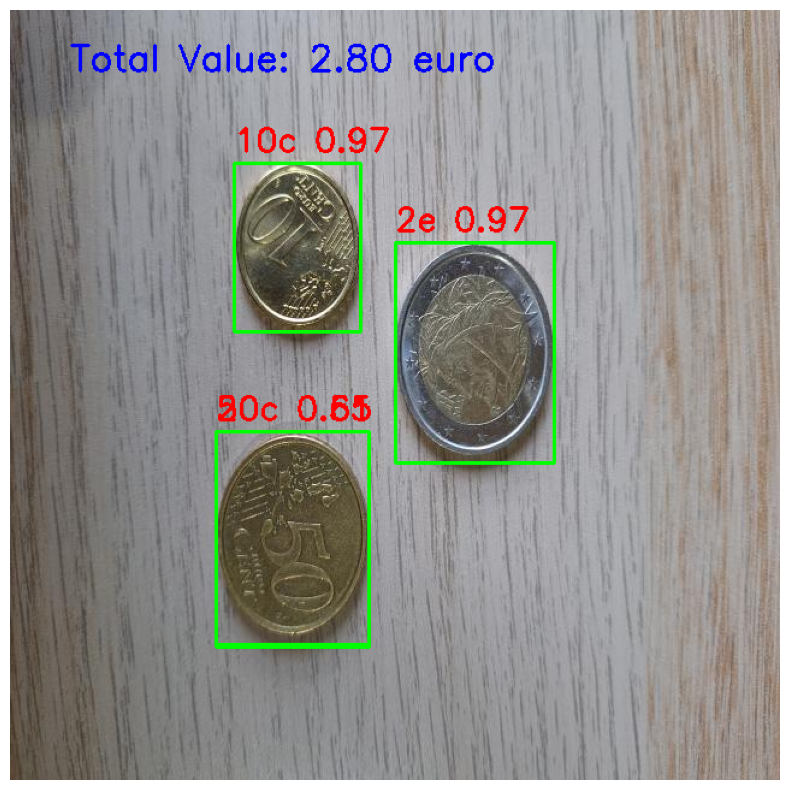

Class Names: {0: '10c', 1: '1c', 2: '1e', 3: '20c', 4: '2c', 5: '2e', 6: '50c', 7: '5c'}


In [19]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2


model = YOLO("/content/gdrive/My Drive/Università/coin detection/runs/detect/train/weights/best.pt")


path = r'/content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/20240523_174340_jpg.rf.68b30c66d5096aa2d769bade5e552d9b.jpg'
results = model(path, save=True, save_txt=True, conf=0.25, iou=0.45)


image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0


for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        value = class_values[class_name]
        total_value += value
        label = f'{class_name} {confidence:.2f}'


        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)


total_label = f'Total Value: {total_value:.2f}' + ' euro'
cv2.putText(image, total_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)


plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

print("Class Names:", results[0].names)

In [15]:
results = model("/content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/20240523_174340_jpg.rf.68b30c66d5096aa2d769bade5e552d9b.jpg")


image 1/1 /content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/20240523_174340_jpg.rf.68b30c66d5096aa2d769bade5e552d9b.jpg: 640x640 1 10c, 1 20c, 1 2e, 1 50c, 247.5ms
Speed: 4.2ms preprocess, 247.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
!yolo predict model='/content/gdrive/My Drive/Università/coin detection/runs/detect/train/weights/best.pt' source='/content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/20240523_174340_jpg.rf.68b30c66d5096aa2d769bade5e552d9b.jpg'

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/20240523_174340_jpg.rf.68b30c66d5096aa2d769bade5e552d9b.jpg: 640x640 1 10c, 1 20c, 1 2e, 1 50c, 246.1ms
Speed: 16.0ms preprocess, 246.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


2.8000000000000003


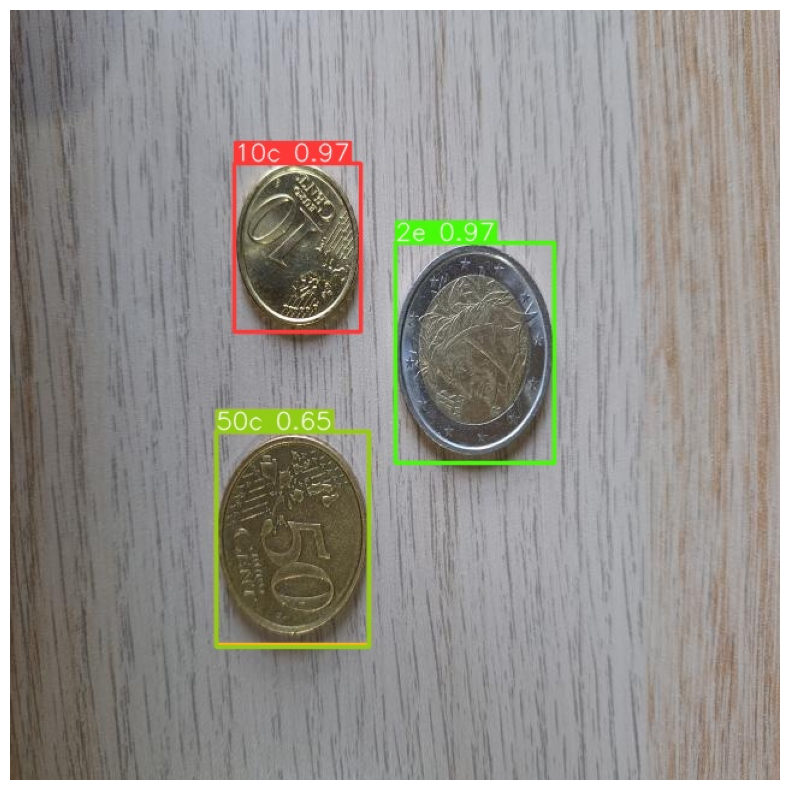

In [16]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

model = YOLO("/content/gdrive/My Drive/Università/coin detection/runs/detect/train/weights/best.pt")
results = model("/content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/20240523_174340_jpg.rf.68b30c66d5096aa2d769bade5e552d9b.jpg")

path = r'/content/runs/detect/predict2/20240523_174340_jpg.rf.68b30c66d5096aa2d769bade5e552d9b.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0

for result in results:
    boxes = result.boxes  # Scatole di bounding
    for box in boxes:
        cls = box.cls  # Classe predetta
        conf = box.conf  # Confidenza della predizione
        label = model.names[int(cls)]  # Nome della classe
        total_value += class_values[label]  # Aggiungi il valore della moneta

print(total_value)


plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


image 1/1 /content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/WhatsApp_Image_2023_06_28_at_12_38_38_1_jpeg_jpg_rf_98bc4339044_jpg.rf.a262187cb656d2630d5928d308e94093.jpg: 640x640 1 10c, 2 1es, 1 20c, 1 2c, 1 2e, 2 50cs, 1 5c, 188.4ms
Speed: 3.0ms preprocess, 188.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


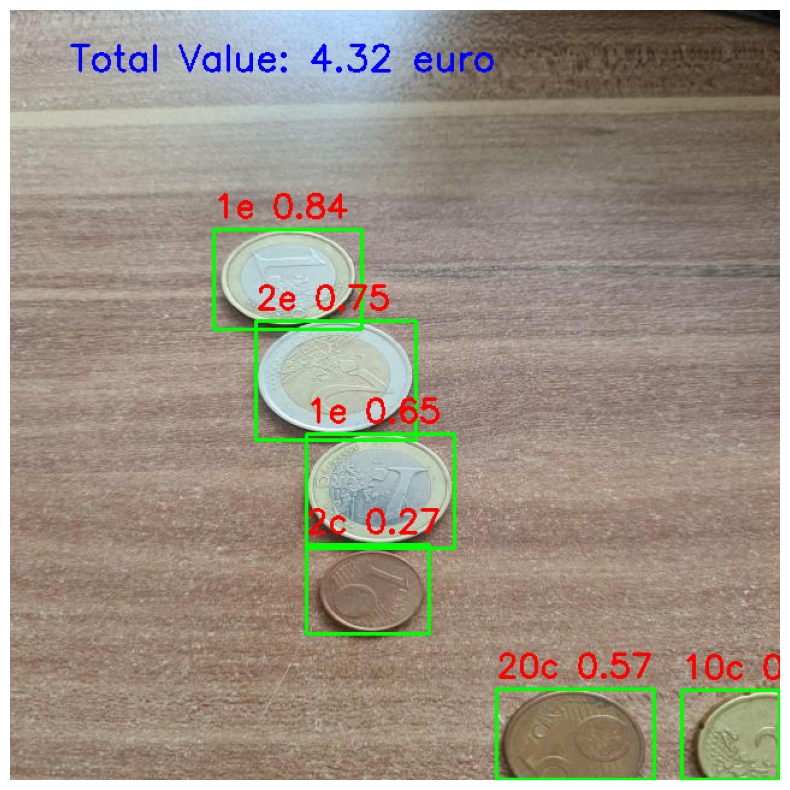

Conteggi delle classi:
1c: 0
2c: 1
5c: 0
10c: 1
20c: 1
50c: 0
1e: 2
2e: 1

Valore totale delle monete: €4.32


In [26]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Carica il modello
model = YOLO("/content/gdrive/My Drive/Università/coin detection/runs/detect/train/weights/best.pt")

# Percorso dell'immagine di input
path = r'/content/gdrive/My Drive/Università/coin detection/datasetV2/test/images/WhatsApp_Image_2023_06_28_at_12_38_38_1_jpeg_jpg_rf_98bc4339044_jpg.rf.a262187cb656d2630d5928d308e94093.jpg'

# Esegui la previsione con Non-Maximum Suppression (NMS)
results = model.predict(source=path, conf=0.25, iou=0.45)

# Carica l'immagine con OpenCV e converti in RGB
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dizionario per il valore delle monete
class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0

# Conta delle classi
class_counts = {key: 0 for key in class_values.keys()}

# Funzione per calcolare l'intersezione su unione (IoU)
def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

# Applica NMS manualmente
boxes = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        boxes.append((x1, y1, x2, y2, confidence, class_name))

# Ordina le box per confidenza
boxes = sorted(boxes, key=lambda x: x[4], reverse=True)

nms_boxes = []
while boxes:
    chosen_box = boxes.pop(0)
    nms_boxes.append(chosen_box)
    boxes = [box for box in boxes if iou(chosen_box[:4], box[:4]) < 0.45]

# Analizza i risultati delle previsioni
for (x1, y1, x2, y2, confidence, class_name) in nms_boxes:
    value = class_values[class_name]
    total_value += value
    class_counts[class_name] += 1  # Incrementa il conteggio della classe
    label = f'{class_name} {confidence:.2f}'

    # Disegna la bounding box e l'etichetta sull'immagine
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Aggiungi il totale sull'immagine
total_label = f'Total Value: {total_value:.2f} euro'
cv2.putText(image, total_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Visualizza l'immagine
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# Stampa i conteggi delle classi e il valore totale
print("Conteggi delle classi:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print(f"\nValore totale delle monete: €{total_value:.2f}")